# Email Spam Detection

Importing the necessary modules

In [3]:
df = pd.read_csv("C:/Users/sethu/OneDrive/Desktop/spam.csv", encoding='ISO-8859-1')

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.DataFrame(df.iloc[:,:2]).rename(columns = {"v1":"class", "v2":"text"})
df.head()
     

,class,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [5]:
df['class'].value_counts()

ham     4825
spam     747
Name: class, dtype: int64

<AxesSubplot:xlabel='class', ylabel='count'>

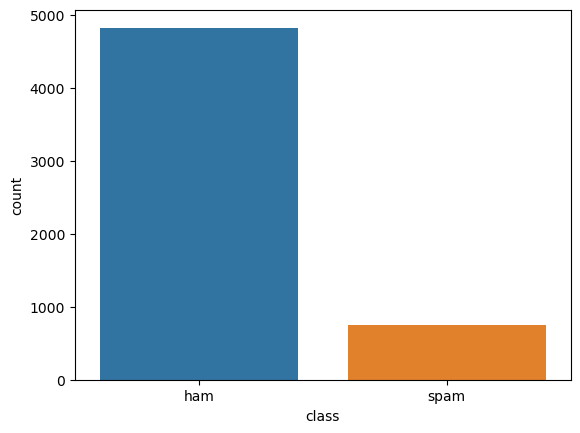

In [6]:
sns.countplot(x = "class", data=df)

In [7]:
import numpy as np
from sklearn.utils import resample

majority_class = df[df['class'] == 'ham']
minority_class = df[df['class'] == 'spam']

oversampled_minority_class = resample(minority_class, replace=True, n_samples=majority_class.shape[0],  random_state=42)  

df = pd.DataFrame(np.concatenate((majority_class, oversampled_minority_class), axis=0), columns=['class','text'])


In [8]:
df['class'].value_counts()
     

ham     4825
spam    4825
Name: class, dtype: int64

In [9]:
import re

df['text'] = df['text'].replace(to_replace = "[^a-zA-Z0-9\s]",value = '', regex = True)



In [10]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    df['text'], df['class'], 
    test_size=0.2, 
    random_state=42, 
    stratify=df['class']
)

print("Training set size:", len(X_train))
print("Testing set size:", len(X_test))


Training set size: 7720
Testing set size: 1930


In [11]:
from sklearn.feature_extraction.text import TfidfVectorizer


tfidf_vectorizer = TfidfVectorizer()

X_train = tfidf_vectorizer.fit_transform(X_train)
X_test = tfidf_vectorizer.transform(X_test)

In [12]:
from sklearn.svm import SVC
model = SVC(probability = True)
model.fit(X_train, y_train)


SVC(probability=True)

In [13]:
y_pred = model.predict(X_test)

In [14]:
from sklearn.metrics import confusion_matrix, accuracy_score
print(confusion_matrix(y_pred, y_test))

[[964   1]
 [  1 964]]


In [15]:
print("accuracy: ",accuracy_score(y_pred, y_test))

accuracy:  0.9989637305699481
